In [14]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tangram as tg 
import numpy as np 

In [3]:
#Spatial data 
ad_spatial=sc.read('ST_gene_by_cell.csv').transpose()
ad_spatial.var_names_make_unique()

In [4]:
#Single cell data 
ad_sc=sc.read('GSE92332_atlas_UMIcounts.txt',sep='\t').transpose()

In [5]:
#merge data after applying tangram 
ad_tangram=sc.read_h5ad('sc_genes_spatial_cell.h5ad')

In [6]:
# cell by gene matrix 
print(ad_spatial.shape) 
print(ad_sc.shape)
print(ad_tangram.shape)

(7416, 241)
(7216, 15971)
(7416, 15971)


In [7]:
coordinates = pd.read_csv("tissue_positions_list.csv", index_col=0,header=None)
#counts = sc.read_csv("./pnas.1912459116.sd12.csv").transpose()
#adata_merfish = counts[coordinates.index, :]
ad_spatial.obsm["spatial"] = coordinates.to_numpy()
ad_tangram.obsm["spatial"] = coordinates.to_numpy()

In [8]:
#load the already clusterd and cell type name file 

cluster= pd.read_csv('louvain_cluster.dat',sep=',',index_col=0,header=0)
cluster=cluster.to_numpy()
ctname=pd.read_csv('BiologicalNameOfCT.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
new_cluster_names=ctname[:,0]

ad_spatial.obs['knownClusters'] = cluster.astype(str)
ad_tangram.obs['knownClusters'] = cluster.astype(str)


print('ct name',new_cluster_names)

ct name ['B_Follicular_Circulating' 'B_Plasma' 'Endothelial'
 'Enterocyte_Bottom_Villus' 'Enterocyte_Mid_Villus'
 'Enterocyte_Top_Villus' 'Goblet' 'ICC' 'Macrophage_p_DC'
 'Myenteric_Plexus' 'Paneth' 'Pericyte' 'Smooth_Muscle' 'Stem_p_TA'
 'Stromal' 'T_CD4p' 'T_CD8p' 'Telocyte' 'Tuft']


/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


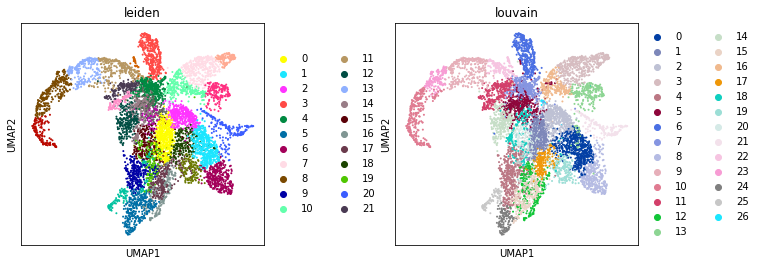

In [9]:
sc.pp.pca(ad_spatial)
sc.pp.neighbors(ad_spatial)
sc.tl.umap(ad_spatial)
sc.tl.leiden(ad_spatial, resolution=1.5)
sc.tl.louvain(ad_spatial,resolution=1.5)


plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(ad_spatial, color=["leiden","louvain"], wspace=0.4,show=True, save='_spatial_leiden_louvain.png')

ad_spatial.obs['knownClusters'] = ad_spatial.obs['knownClusters'].cat.rename_categories(new_cluster_names)


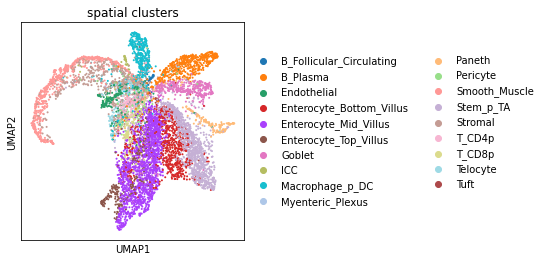

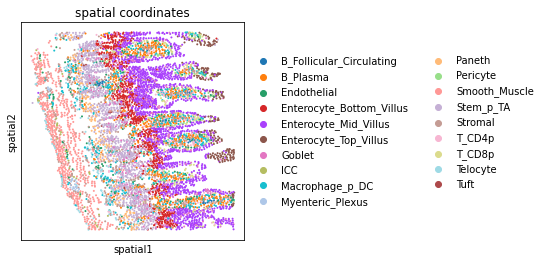

In [10]:
sc.pl.umap(ad_spatial, color="knownClusters",title='spatial clusters',show=True,save='_spatial_known_clusters.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters",title='spatial coordinates')

/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


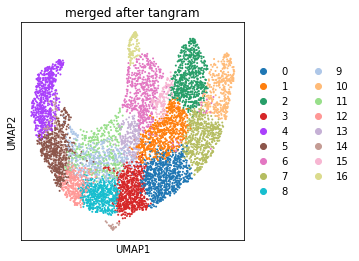

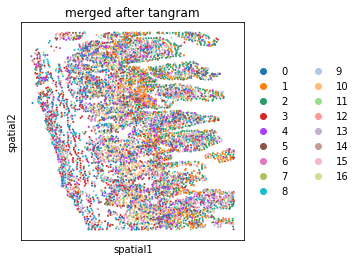

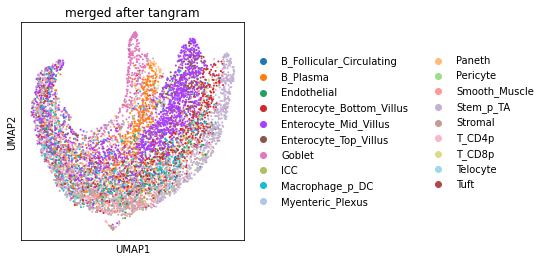

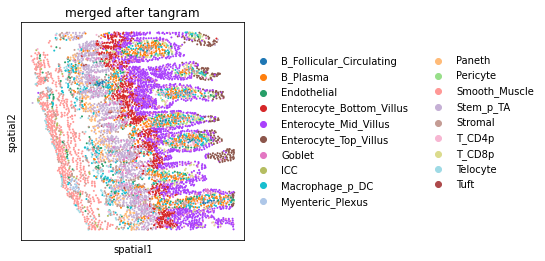

In [11]:
sc.pp.pca(ad_tangram)
sc.pp.neighbors(ad_tangram)
sc.tl.umap(ad_tangram)
sc.tl.leiden(ad_tangram, key_added="leiden")

sc.pl.umap(ad_tangram, color=["leiden"],wspace=0.4,show=True,title='merged after tangram',save='_merged_leiden.png')
sc.pl.embedding(ad_tangram, basis="spatial", color="leiden",title='merged after tangram')


ad_tangram.obs['knownClusters'] = ad_tangram.obs['knownClusters'].cat.rename_categories(new_cluster_names)
sc.pl.umap(ad_tangram, color=['knownClusters'],wspace=0.4,show=True,title='merged after tangram',save='_merged_known_clusters.png')
sc.pl.embedding(ad_tangram, basis="spatial", color="knownClusters",title='merged after tangram')

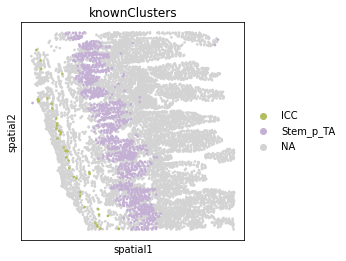

In [47]:
sc.pl.embedding(ad_spatial, basis='spatial',color="knownClusters", groups=["ICC", "Stem_p_TA"], alpha=1,size=30)


In [65]:
genesum=np.sum(ad_spatial.X,axis=0)
genemean=np.mean(ad_spatial.X,axis=0)
cellsum=np.sum(ad_spatial.X,axis=1)
print(genesum.shape,genemean.shape,cellsum.shape)
#df=pd.DataFrame(data=adata.X.transpose(), index=adata.var_names , columns=adata.obs_names)
#df.to_csv("xxoutput_filter_"+filename+".csv")
cellname=ad_spatial.obs_names.to_numpy()
genename_spatial=ad_spatial.var_names.to_numpy()
genename_merged=ad_tangram.var_names.to_numpy()

#genename=genename.reshape((len(genename),1))

index=np.argsort(-genesum)
#Top 20 gene sorted according to their mean expression in spatial data 
for i in range(20):
    print(genename_spatial[index[i]],genemean[index[i]])
    
  
#somehow tangram make all the gene name in lowercase letter 
genename_merged = [each_string.capitalize() for each_string in genename_merged]

common_genes=set(genename_spatial).intersection(set(genename_merged))

print('\n\ncommon',common_genes)

(241,) (241,) (7416,)
Neat1 10.207659
Slc51a 8.789644
Slc5a1 7.3478966
Acta2 6.8211975
Txndc5 6.3046117
Clca3b 5.827535
Cps1 5.5151024
Apob 4.903722
Nlrp6 3.6201456
Sdc1 3.3996763
Maoa 2.2402914
Vim 1.9935275
Net1 1.9676375
Mptx2 1.8737864
Fzd5 1.6391586
H2-Eb1 1.6127292
Ada 1.501753
Mki67 1.2556634
Slc12a2 1.2481122
Ifnar1 1.1716559


common {'Gipr', 'Cd79a', 'Galr1', 'Il3ra', 'Clca3b', 'Krt7', 'Fzd6', 'Chrm3', 'Sstr1', 'Gpr55', 'Lpar2', 'Ptprcap', 'Ccnl2', 'Vim', 'Apob', 'Nkg7', 'Lpar5', 'Fzd8', 'Adrb1', 'Gpr18', 'Maoa', 'Acta2', 'Il7r', 'C1qc', 'Tymp', 'Mki67', 'Adgrd1', 'Adra2a', 'Cd79b', 'Gzmb', 'Nes', 'Kit', 'Mboat4', 'Lrmp', 'Il10', 'Marcksl1', 'Txndc5', 'Adgrf5', 'Gper1', 'Hrh2', 'Stmn1', 'Tpsb2', 'Mzb1', 'Rcor2', 'Cd14', 'Clec9a', 'Ptgdr', 'Ifnar1', 'Elavl3', 'Vcan', 'Avil', 'Ffar3', 'Lpar3', 'Lgr5', 'Ptger4', 'Slc26a4', 'Agr3', 'C1qb', 'Ptgdr2', 'Sell', 'Smo', 'Adrb2', 'Cd34', 'Fzd9', 'Etv1', 'Tspan13', 'Net1', 'Cd3e', 'Sstr2', 'Cmc1', 'Tnfrsf21', 'Ltb4r1', 'Fzd5', 'Ptger3', 

In [53]:
new_cluster_names

array(['B_Follicular_Circulating', 'B_Plasma', 'Endothelial',
       'Enterocyte_Bottom_Villus', 'Enterocyte_Mid_Villus',
       'Enterocyte_Top_Villus', 'Goblet', 'ICC', 'Macrophage_p_DC',
       'Myenteric_Plexus', 'Paneth', 'Pericyte', 'Smooth_Muscle',
       'Stem_p_TA', 'Stromal', 'T_CD4p', 'T_CD8p', 'Telocyte', 'Tuft'],
      dtype=object)

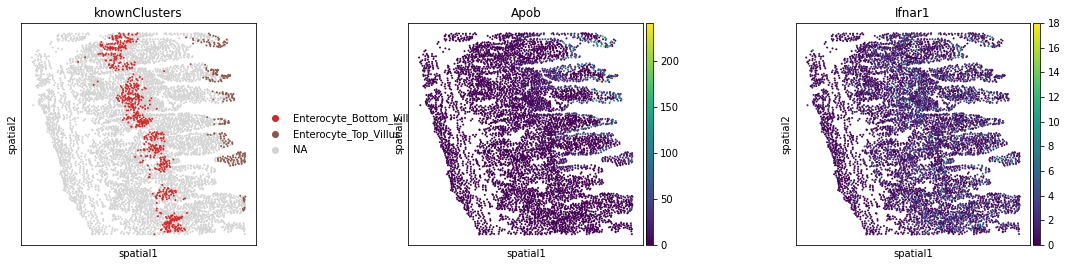

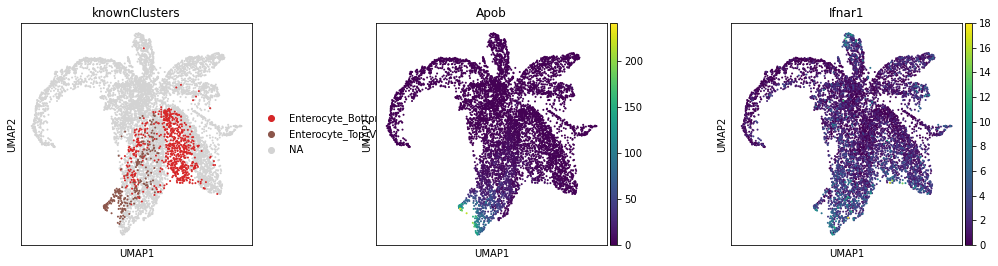

In [68]:
#plot genes and cell types on spatial data 
sc.pl.embedding(ad_spatial, basis='spatial',wspace=0.5,
color=["knownClusters", "Apob","Ifnar1" ],
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

sc.pl.umap(ad_spatial, color=["knownClusters", "Apob","Ifnar1" ],
wspace=0.4,show=True,
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

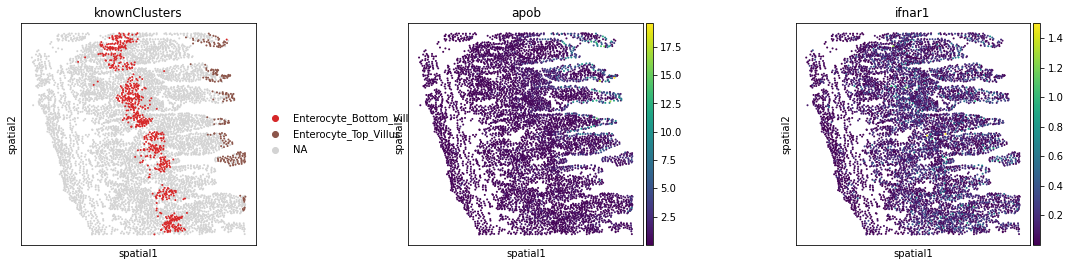

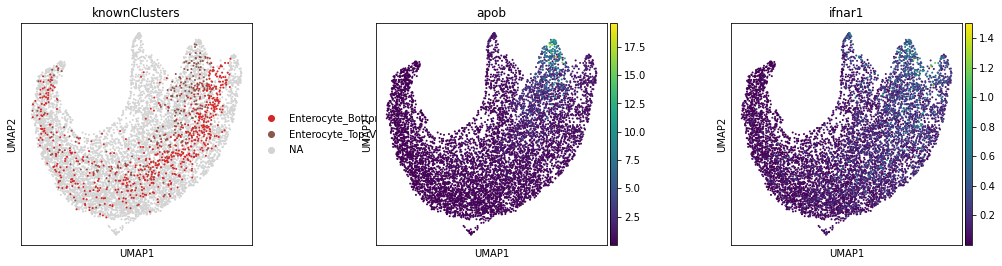

In [67]:
#plot genes and cell types on mapping merged data 
sc.pl.embedding(ad_tangram, basis='spatial',wspace=0.5,
color=["knownClusters", "apob","ifnar1" ],
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

sc.pl.umap(ad_tangram, color=["knownClusters", "apob","ifnar1" ],
wspace=0.4,show=True,
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])
